<a href="https://colab.research.google.com/github/ClauRozasG/TextMining-Encuestas/blob/main/An%C3%A1lisis_de_respuesta_de_encuestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df_enps_202310= pd.read_csv("Enps_Pacifico_202310.csv")
df_enps_202310.head()

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202310,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Actualmente el trabajo hibrido,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
1,Pacifico Seguros,202310,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Buscar una mejor forma de que haya estacionami...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
2,Pacifico Seguros,202310,300008,NaN,EX-JEX-0083-PACS,"De acuerdo a tu percepción, ¿qué factores cree...",La forma de trabajo (hibrido),DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
3,Pacifico Seguros,202310,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202310,300012,NaN,EX-JEX-0083-PACS,"De acuerdo a tu percepción, ¿qué factores cree...",NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]


In [16]:
df_enps_202310.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8570 entries, 0 to 8569
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    8570 non-null   object
 1   PERIODO                    8570 non-null   int64 
 2   CODIGO_COLABORADOR         8570 non-null   int64 
 3   NOTA_AGRUPADA              3428 non-null   object
 4   COD_PREGUNTA               8570 non-null   object
 5   DESC_PREGUNTA              8570 non-null   object
 6   NOTA_ABIERTA               4954 non-null   object
 7   UO1                        8570 non-null   object
 8   UO2                        8570 non-null   object
 9   UO3                        8570 non-null   object
 10  UO4                        8570 non-null   object
 11  UO5                        8570 non-null   object
 12  CLASIFICACION_DE_UNIDADES  8570 non-null   object
 13  TIPO_ROL_HOM               4950 non-null   object
 14  Total Vi

In [7]:
df_enps_202304= pd.read_csv("Enps_Pacifico_202304 (1).csv")
df_enps_202304.head()

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,NaN,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]


In [17]:
df_enps_202304.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    7092 non-null   object
 1   PERIODO                    7092 non-null   int64 
 2   CODIGO_COLABORADOR         7092 non-null   int64 
 3   NOTA_AGRUPADA              3546 non-null   object
 4   COD_PREGUNTA               7092 non-null   object
 5   DESC_PREGUNTA              7092 non-null   object
 6   NOTA_ABIERTA               3207 non-null   object
 7   UO1                        7092 non-null   object
 8   UO2                        7092 non-null   object
 9   UO3                        7092 non-null   object
 10  UO4                        7092 non-null   object
 11  UO5                        7092 non-null   object
 12  CLASIFICACION_DE_UNIDADES  7092 non-null   object
 13  TIPO_ROL_HOM               3784 non-null   object
 14  Total Vi

In [14]:
df_movers= pd.read_csv("movers.csv")
df_movers.head()

,EMPRESA,CODIGO_COLABORADOR,Q22023,Q42023,Diferencia
0,Pacifico Seguros,300012.0,Promotores,Promotores,Se Mantiene
1,Pacifico Seguros,300045.0,Promotores,Promotores,Se Mantiene
2,Pacifico Seguros,300060.0,Promotores,Promotores,Se Mantiene
3,Pacifico Seguros,300094.0,Promotores,Promotores,Se Mantiene
4,Pacifico Seguros,300100.0,Promotores,Promotores,Se Mantiene


In [10]:
print(df_enps_202304.columns)

Index(['EMPRESA', 'PERIODO', 'CODIGO_COLABORADOR', 'NOTA_AGRUPADA',
       'COD_PREGUNTA', 'DESC_PREGUNTA', 'NOTA_ABIERTA', 'UO1', 'UO2', 'UO3',
       'UO4', 'UO5', 'CLASIFICACION_DE_UNIDADES', 'TIPO_ROL_HOM',
       'Total Vida (grupos)', 'CATEGORIA_LABORAL', 'SEXO', 'GRUPO', 'POSICION',
       'Switch Edad', 'Rango_Tiempo_EMPRESA', 'Rango_Tiempo_función'],
      dtype='object')


In [36]:
df_nuevo=pd.concat([df_enps_202304,df_enps_202310],axis=0, ignore_index=True)
df_nuevo

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,NaN,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,Pacifico Seguros,202310,635504,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Perfil digital,NaN,Colaboradores no gerenciales,Masculino,CHAPTER LEAD,CHAPTER LEAD PERIFERICOS GENERALES,ENTRE 30-40Y,1.[0-1],1.[0-1]
15658,Pacifico Seguros,202310,635507,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE VENTA DIGITAL,REVENUE CENTER,...,FFVV,NaN,NaN,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE TELEVENTAS,ENTRE 30-40Y,1.[0-1],1.[0-1]
15659,Pacifico Seguros,202310,635508,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE CANALES DE ATENCION,GESTION DE PROVEEDORES Y CONTROL,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Femenino,AUDITOR,AUDITOR DE CALIDAD,ENTRE 40-50Y,1.[0-1],1.[0-1]
15660,Pacifico Seguros,202310,635509,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,...,FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE VENTAS MODULOS CORPORATIVOS,ENTRE 30-40Y,1.[0-1],1.[0-1]


In [37]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    15662 non-null  object
 1   PERIODO                    15662 non-null  int64 
 2   CODIGO_COLABORADOR         15662 non-null  int64 
 3   NOTA_AGRUPADA              6974 non-null   object
 4   COD_PREGUNTA               15662 non-null  object
 5   DESC_PREGUNTA              15662 non-null  object
 6   NOTA_ABIERTA               8161 non-null   object
 7   UO1                        15662 non-null  object
 8   UO2                        15662 non-null  object
 9   UO3                        15662 non-null  object
 10  UO4                        15662 non-null  object
 11  UO5                        15662 non-null  object
 12  CLASIFICACION_DE_UNIDADES  15662 non-null  object
 13  TIPO_ROL_HOM               8734 non-null   object
 14  Total 

In [38]:
df_nuevo=df_nuevo.fillna(' ')
df_nuevo

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,Pacifico Seguros,202310,635504,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Perfil digital,,Colaboradores no gerenciales,Masculino,CHAPTER LEAD,CHAPTER LEAD PERIFERICOS GENERALES,ENTRE 30-40Y,1.[0-1],1.[0-1]
15658,Pacifico Seguros,202310,635507,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE VENTA DIGITAL,REVENUE CENTER,...,FFVV,,,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE TELEVENTAS,ENTRE 30-40Y,1.[0-1],1.[0-1]
15659,Pacifico Seguros,202310,635508,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE CANALES DE ATENCION,GESTION DE PROVEEDORES Y CONTROL,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,AUDITOR,AUDITOR DE CALIDAD,ENTRE 40-50Y,1.[0-1],1.[0-1]
15660,Pacifico Seguros,202310,635509,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,...,FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE VENTAS MODULOS CORPORATIVOS,ENTRE 30-40Y,1.[0-1],1.[0-1]


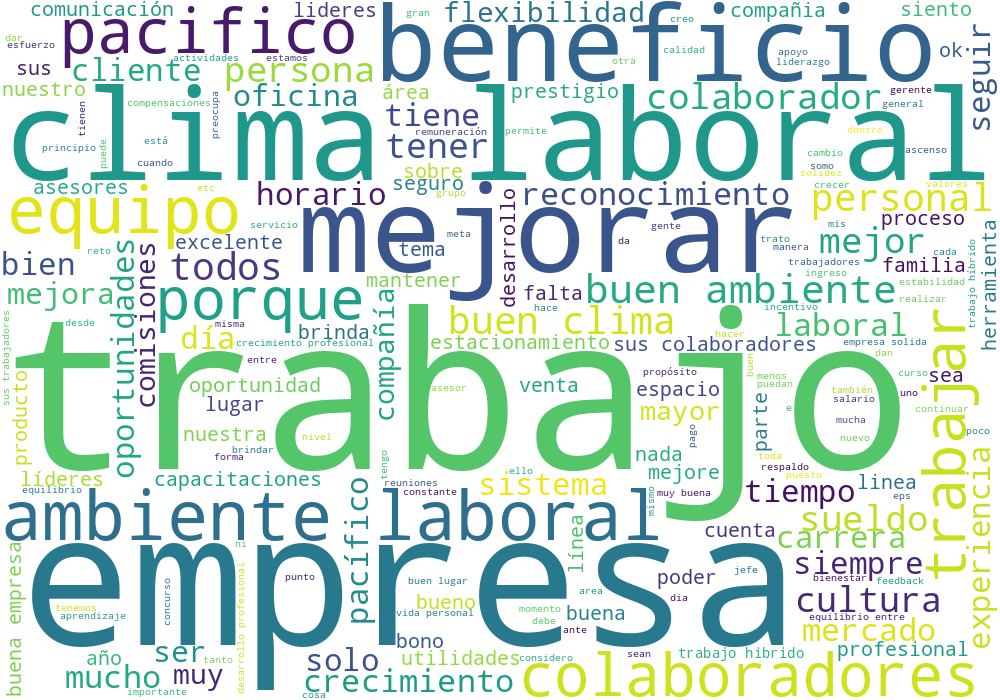

In [39]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' '])

for mensaje in df_nuevo['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

In [22]:
unicas_preguntas=df_nuevo['COD_PREGUNTA'].unique()
unicas_preguntas

array(['EX-JEX-0026-PACS', 'EX-JEX-0072-PACS', 'EX-JEX-0001-PACS',
       'EX-JEX-0025-PACS', 'EX-JEX-0083-PACS'], dtype=object)

In [40]:
df_nuevo_promotor=df_nuevo[df_nuevo['NOTA_AGRUPADA']=='Promotores'].copy()
df_nuevo_promotor

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
4463,Pacifico Seguros,202304,300012,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4464,Pacifico Seguros,202304,300045,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,...,NO FFVV,Soporte estratégico,,Senior Leader,Masculino,GERENTE,GTE DIV BENEFICIOS TECNO Y HABIL ESTRATE,ENTRE 40-50Y,4.[>10],3.[3-10]
4465,Pacifico Seguros,202304,300060,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA COMERCIAL,CORPORATIVO COMERCIAL Y LABORAL,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,GERENTE,GERENTE ADJUNTO COMERCIAL,ENTRE 40-50Y,4.[>10],1.[0-1]
4466,Pacifico Seguros,202304,300094,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE OPERACIONES Y BENEFICIOS VIDA,"COBRANZA, RECAUDACIONES, UDP Y BOI",...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,EJECUTIVO,EJECUTIVO DE GESTION DE COBRANZAS,ENTRE 50 - 65Y,4.[>10],3.[3-10]
4467,Pacifico Seguros,202304,300100,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SINIESTROS DE RIESGOS GENERALES,TECNICO DE SINIESTROS,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Masculino,SUBGERENTE,SUBGERENTE TECNICO DE SINIESTROS SSGG,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14022,Pacifico Seguros,202310,635504,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Perfil digital,,Colaboradores no gerenciales,Masculino,CHAPTER LEAD,CHAPTER LEAD PERIFERICOS GENERALES,ENTRE 30-40Y,1.[0-1],1.[0-1]
14023,Pacifico Seguros,202310,635507,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE VENTA DIGITAL,REVENUE CENTER,...,FFVV,,,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE TELEVENTAS,ENTRE 30-40Y,1.[0-1],1.[0-1]
14024,Pacifico Seguros,202310,635508,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE CANALES DE ATENCION,GESTION DE PROVEEDORES Y CONTROL,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,AUDITOR,AUDITOR DE CALIDAD,ENTRE 40-50Y,1.[0-1],1.[0-1]
14025,Pacifico Seguros,202310,635509,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,...,FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE VENTAS MODULOS CORPORATIVOS,ENTRE 30-40Y,1.[0-1],1.[0-1]


In [41]:
df_nuevo_pasivos=df_nuevo[df_nuevo['NOTA_AGRUPADA']=='Pasivos'].copy()
df_nuevo_pasivos

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
3910,Pacifico Seguros,202304,300008,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
3911,Pacifico Seguros,202304,300023,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
3912,Pacifico Seguros,202304,300053,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION DE GDH MKT Y SOST,COE AGIL Y ESTRATEGIA DE PERSONAS,ESTRATEGIA DE PERSONAS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,GERENTE,GERENTE ADJUNTO DE PEOPLE ANALYTICS,ENTRE 40-50Y,4.[>10],2.[1-3]
3913,Pacifico Seguros,202304,300087,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA COMERCIAL,CORPORATIVO COMERCIAL Y LABORAL,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,EJECUTIVO,EJECUTIVO COMERCIAL SENIOR,ENTRE 40-50Y,4.[>10],3.[3-10]
3914,Pacifico Seguros,202304,300159,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA COMERCIAL,REGION NORTE I,...,NO FFVV,Soporte estratégico,,Midle manager,Femenino,GERENTE,GERENTE DE OFICINA A,ENTRE 40-50Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,Pacifico Seguros,202310,634930,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA LIMA,AGENCIAS VIDA LIMA,...,FFVV,,2.[2-4],Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE SEGUROS,ENTRE 30-40Y,1.[0-1],1.[0-1]
12983,Pacifico Seguros,202310,634942,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA LIMA,AGENCIAS VIDA LIMA,...,FFVV,,2.[2-4],Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE SEGUROS,ENTRE 40-50Y,1.[0-1],1.[0-1]
12984,Pacifico Seguros,202310,635007,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,GERENCIA DE RENTAS VITALICIAS,GERENCIA DE RENTAS VITALICIAS,...,FFVV,,,Colaboradores no gerenciales,Femenino,ASESOR,ASESOR LIDER RENTAS VITALICIAS,ENTRE 40-50Y,1.[0-1],1.[0-1]
12985,Pacifico Seguros,202310,635055,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS SALUD,AGENCIA ÁGIL DE SALUD,...,FFVV,,,Colaboradores no gerenciales,Femenino,ASESOR,ASESOR DE SALUD,ENTRE 30-40Y,1.[0-1],1.[0-1]


In [45]:
df_nuevo_detractores=df_nuevo[df_nuevo['NOTA_AGRUPADA']=='Detractores'].copy()
df_nuevo_detractores

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
3648,Pacifico Seguros,202304,302003,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION LEGAL Y PREVENCION DE FRAUDES,ASUNTOS REGULATORIOS Y PRODUCTOS,ASUNTOS REGULATORIOS Y PRODUCTOS,...,NO FFVV,Soporte estratégico,,Midle manager,Masculino,GERENTE,GERENTE LEGAL,ENTRE 50 - 65Y,4.[>10],3.[3-10]
3649,Pacifico Seguros,202304,302311,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE OPERACIONES Y BENEFICIOS VIDA,SERVICIO DE ATEN AL CLI Y GEST DE POLIZA,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE ATENCION DE MODULOS CORPORA,ENTRE 40-50Y,4.[>10],3.[3-10]
3650,Pacifico Seguros,202304,302506,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA COMERCIAL,CORREDORES CONSOLIDADOS Y REGIONES,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,SUSCRIPTOR,SUSCRIPTOR,ENTRE 30-40Y,4.[>10],3.[3-10]
3651,Pacifico Seguros,202304,302513,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS SALUD,AGENCIA LIMA 2,...,FFVV,,,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR LIDER,ENTRE 50 - 65Y,4.[>10],3.[3-10]
3652,Pacifico Seguros,202304,362074,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA LIMA,AGENCIAS VIDA LIMA,...,FFVV,,2.[2-4],Colaboradores no gerenciales,Femenino,ASESOR,ASESOR LIDER,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,Pacifico Seguros,202310,634941,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA LIMA,AGENCIAS VIDA LIMA,...,FFVV,,1.[0-1],Colaboradores no gerenciales,Femenino,ASESOR,ASESOR DE SEGUROS,ENTRE 40-50Y,1.[0-1],1.[0-1]
12512,Pacifico Seguros,202310,634985,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA REGIONES,AGENCIAS VIDA REGIONES,...,FFVV,,2.[2-4],Colaboradores no gerenciales,Femenino,ASESOR,ASESOR DE SEGUROS,MENOR 30Y,1.[0-1],1.[0-1]
12513,Pacifico Seguros,202310,634995,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA REGIONES,AGENCIAS VIDA REGIONES,...,FFVV,,1.[0-1],Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE SEGUROS,ENTRE 40-50Y,1.[0-1],1.[0-1]
12514,Pacifico Seguros,202310,635004,Detractores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION CANALES DE ASESORIA PERSONAL,AGENCIAS VIDA REGIONES,AGENCIAS VIDA REGIONES,...,FFVV,,2.[2-4],Colaboradores no gerenciales,Femenino,ASESOR,ASESOR DE SEGUROS,MENOR 30Y,1.[0-1],1.[0-1]


In [46]:
df_nuevo_detractores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 3648 to 12515
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    465 non-null    object
 1   PERIODO                    465 non-null    int64 
 2   CODIGO_COLABORADOR         465 non-null    int64 
 3   NOTA_AGRUPADA              465 non-null    object
 4   COD_PREGUNTA               465 non-null    object
 5   DESC_PREGUNTA              465 non-null    object
 6   NOTA_ABIERTA               465 non-null    object
 7   UO1                        465 non-null    object
 8   UO2                        465 non-null    object
 9   UO3                        465 non-null    object
 10  UO4                        465 non-null    object
 11  UO5                        465 non-null    object
 12  CLASIFICACION_DE_UNIDADES  465 non-null    object
 13  TIPO_ROL_HOM               465 non-null    object
 14  Total

In [47]:
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [48]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' '])

for mensaje in df_nuevo_detractores['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

ValueError: ignored